In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [3]:
# Load the dataset
df = pd.read_csv("C:/Users/Admin/Desktop/jupyter project/crop_yield_data_encoded.csv")
# Display the first few rows to understand the structure
print(df.head())


   Area  Year  Item  Crop Yield (tons/hectare)  Avg Rainfall (mm/year)  \
0     1  2023     4                       3.20                 1367.74   
1     4  2020     1                       2.82                 1199.58   
2     1  2024     1                       3.73                  824.52   
3     3  2020     1                       4.89                  814.32   
4     3  2023     2                       4.67                 1137.73   

   Pesticide Turns  Avg Temperature (C)  Soil Quality  
0                7                28.33             3  
1                7                24.24             0  
2               10                34.16             1  
3                9                28.31             1  
4                9                22.53             3  


In [4]:
# Check for missing values
print(df.isnull().sum()) 
df = df.dropna()


Area                         0
Year                         0
Item                         0
Crop Yield (tons/hectare)    0
Avg Rainfall (mm/year)       0
Pesticide Turns              0
Avg Temperature (C)          0
Soil Quality                 0
dtype: int64


In [8]:
df.fillna(method='ffill', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20960\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [10]:
mean_absolute_error, mean_squared_error, r2_score, confusion_matrix

(<function sklearn.metrics._regression.mean_absolute_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>,
 <function sklearn.metrics._regression.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared='deprecated')>,
 <function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)>,
 <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>)

In [12]:
corr_matrix = df.select_dtypes(include=['number']).corr()
print(corr_matrix)


                               Area      Year      Item  \
Area                       1.000000  0.039692 -0.032406   
Year                       0.039692  1.000000 -0.013087   
Item                      -0.032406 -0.013087  1.000000   
Crop Yield (tons/hectare) -0.023650  0.043125  0.012163   
Avg Rainfall (mm/year)     0.002820  0.003784  0.014347   
Pesticide Turns            0.046329  0.046463 -0.162625   
Avg Temperature (C)        0.026294  0.025694 -0.046413   
Soil Quality               0.141972  0.016092  0.037432   

                           Crop Yield (tons/hectare)  Avg Rainfall (mm/year)  \
Area                                       -0.023650                0.002820   
Year                                        0.043125                0.003784   
Item                                        0.012163                0.014347   
Crop Yield (tons/hectare)                   1.000000                0.208815   
Avg Rainfall (mm/year)                      0.208815                

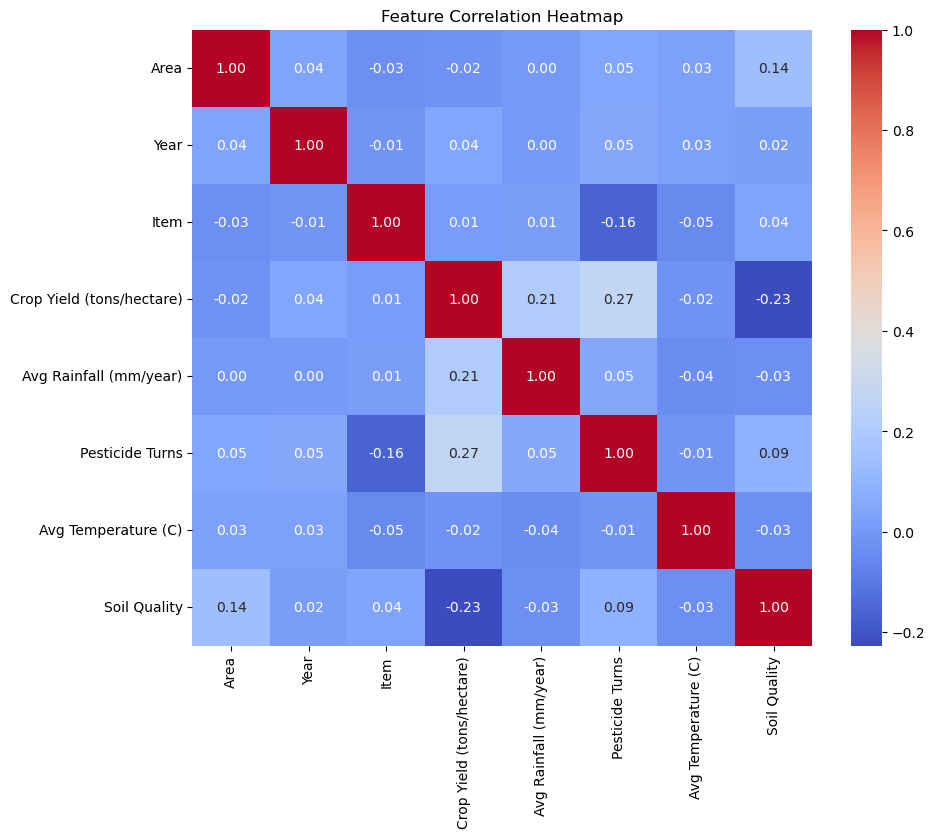

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [16]:
X = df.drop(['Crop Yield (tons/hectare)'], axis=1) 
y = df['Crop Yield (tons/hectare)']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in ["Item", "Soil Quality"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert categories to numbers
    label_encoders[col] = le  # Store encoders for future use


In [22]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
y_pred = model.predict(X_test)

In [26]:
y_pred

array([3.3132, 3.883 , 3.7092, 3.8977, 3.4819, 3.3946, 3.1303, 2.9761,
       3.1403, 3.3757, 3.2635, 3.4129, 3.8135, 3.1027, 3.5024, 4.1521,
       2.4806, 4.1569, 3.7864, 3.5597, 3.39  , 3.3429, 3.0102, 4.5788,
       2.9854, 4.3121, 2.7363, 3.6458, 3.2919, 3.9035, 3.5249, 3.6174,
       3.4053, 3.9921, 2.7432, 5.064 , 2.7288, 4.0832, 3.808 , 3.6944])

In [28]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.7761075


In [30]:
X_test_array = X_test.to_numpy().flatten()  # Convert DataFrame to array and flatten


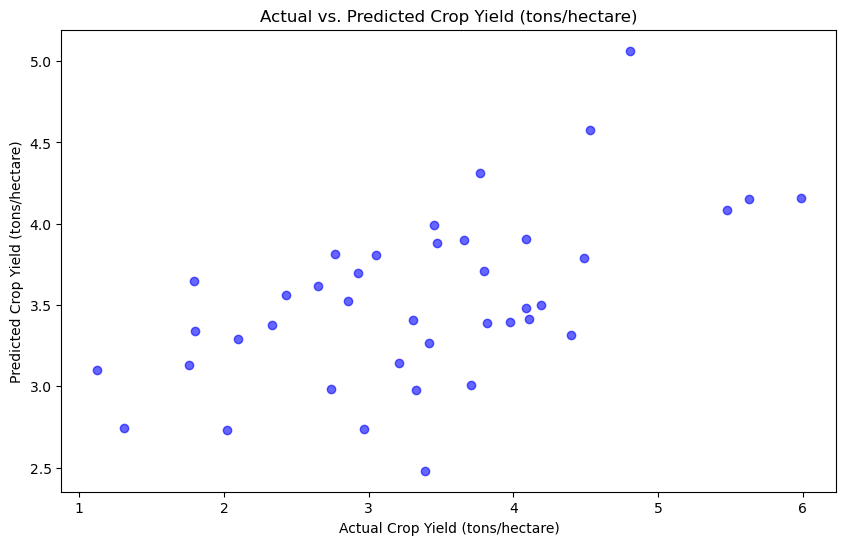

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.xlabel('Actual Crop Yield (tons/hectare)')
plt.ylabel('Predicted Crop Yield (tons/hectare)')
plt.title('Actual vs. Predicted Crop Yield (tons/hectare)')
plt.show()

In [34]:
print("\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")



Model Evaluation:
Mean Absolute Error (MAE): 0.78


NameError: name 'rmse' is not defined

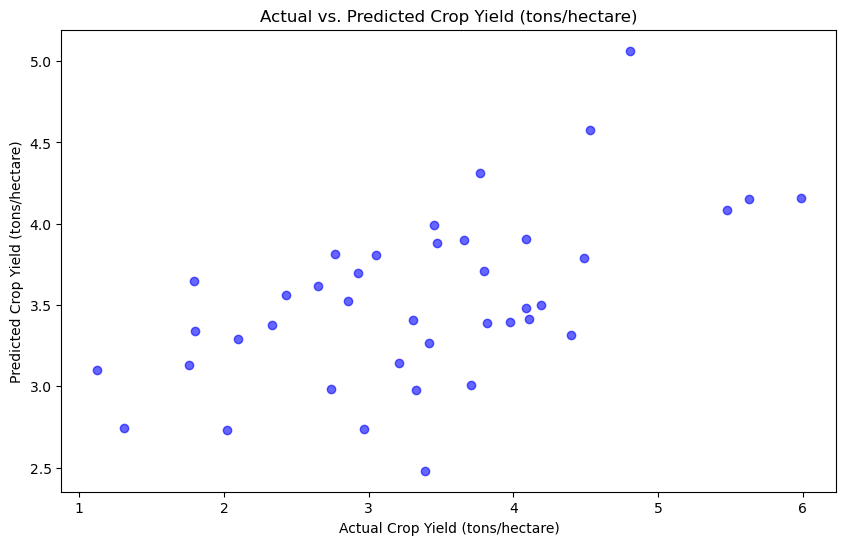

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.xlabel('Actual Crop Yield (tons/hectare)')
plt.ylabel('Predicted Crop Yield (tons/hectare)')
plt.title('Actual vs. Predicted Crop Yield (tons/hectare)')
plt.show()

In [38]:
importances = model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


C:\Users\Admin\AppData\Local\Temp\ipykernel_20960\1321406810.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='Crop Yield (tons/hectare)', data=df, ci=None, palette='viridis')
C:\Users\Admin\AppData\Local\Temp\ipykernel_20960\1321406810.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Crop Yield (tons/hectare)', data=df, ci=None, palette='viridis')


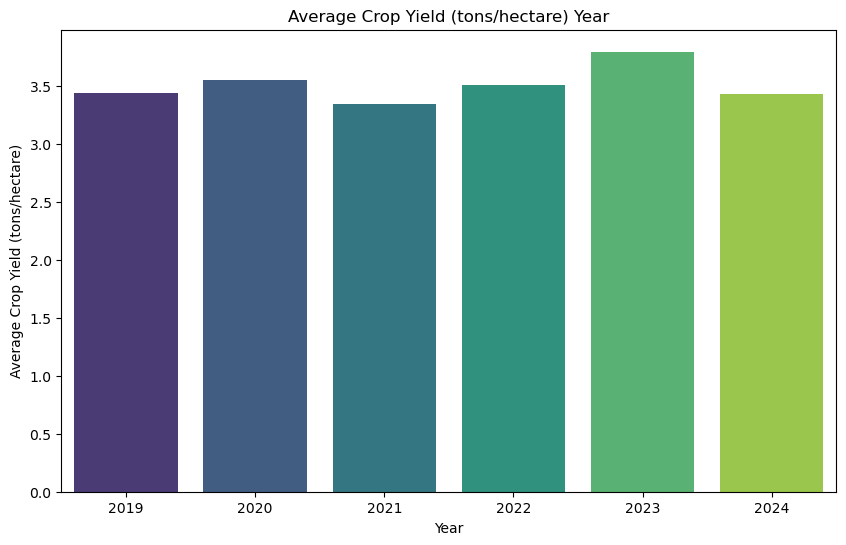

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Crop Yield (tons/hectare)', data=df, ci=None, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Average Crop Yield (tons/hectare)')
plt.title('Average Crop Yield (tons/hectare) Year')
plt.show()